# Scrap predicton

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
d1 = pd.read_csv("data/scrap_data.csv",encoding='cp437')
d1.head()

,OPERATION_PRODUCT,OPERATION_ID,EMPLOYEE_ID,MACHINE_CODE,SHIFT,HOUR,OT_FLAG,PLANED_QUANTITY,PM_EMPLOYEE_ID,IS_SCRAP
0,F6A01513.BLANK_2_HOLES_PIERCE,O0089,E1036,PP04,General,2,0,590,E1043,1
1,F7182114.SPOT_WELD,O0068,E1051,SW01,General,1,0,989,E1060,1
2,FA974313.TRIM,O0072,E1036,PP02,General,1,0,629,E1043,1
3,B0Y17741.BLANK_HOLE_PIERCE,O0095,E1032,PP02,General,2,0,1008,E1043,1
4,FA974313.FORM,O0041,E1037,PP03,General,1,0,637,E1043,1


# Label Encoding Categorical columns

In [104]:
d1["OPERATION_PRODUCT"] = d1["OPERATION_PRODUCT"].astype('category')
d1["OPERATION_ID"] = d1["OPERATION_ID"].astype('category')
d1["EMPLOYEE_ID"] = d1["EMPLOYEE_ID"].astype('category')
d1["MACHINE_CODE"] = d1["MACHINE_CODE"].astype('category')
d1["SHIFT"] = d1["SHIFT"].astype('category')
d1["PM_EMPLOYEE_ID"] = d1["PM_EMPLOYEE_ID"].astype('category')
d1.dtypes

OPERATION_PRODUCT    category
OPERATION_ID         category
EMPLOYEE_ID          category
MACHINE_CODE         category
SHIFT                category
HOUR                    int64
OT_FLAG                 int64
PLANED_QUANTITY         int64
PM_EMPLOYEE_ID       category
IS_SCRAP                int64
dtype: object

In [105]:
d1["OPERATION_PRODUCT"] = d1["OPERATION_PRODUCT"].cat.codes
d1["OPERATION_ID"] = d1["OPERATION_ID"].cat.codes
d1["EMPLOYEE_ID"] = d1["EMPLOYEE_ID"].cat.codes
d1["MACHINE_CODE"] = d1["MACHINE_CODE"].cat.codes
d1["SHIFT"] = d1["SHIFT"].cat.codes
d1["PM_EMPLOYEE_ID"] = d1["PM_EMPLOYEE_ID"].cat.codes
print(d1)

      OPERATION_PRODUCT  OPERATION_ID  EMPLOYEE_ID  MACHINE_CODE  SHIFT  HOUR  \
0                   297            44           31            17      0     2   
1                   309            32           43            30      0     1   
2                   327            36           31            15      0     1   
3                   153            49           26            15      0     2   
4                   326            21           33            16      0     1   
5                   119             3           36             4      0     1   
6                   149            49           26            15      0     1   
7                   100            28           15            28      0     3   
8                   100            28           11            28      0     6   
9                    12            16            5             1      0     2   
10                   31            17           10            26      0     5   
11                  163     

In [106]:
d1['IS_SCRAP'].head()

0    1
1    1
2    1
3    1
4    1
Name: IS_SCRAP, dtype: int64

In [107]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 10 columns):
OPERATION_PRODUCT    1236 non-null int16
OPERATION_ID         1236 non-null int8
EMPLOYEE_ID          1236 non-null int8
MACHINE_CODE         1236 non-null int8
SHIFT                1236 non-null int8
HOUR                 1236 non-null int64
OT_FLAG              1236 non-null int64
PLANED_QUANTITY      1236 non-null int64
PM_EMPLOYEE_ID       1236 non-null int8
IS_SCRAP             1236 non-null int64
dtypes: int16(1), int64(4), int8(5)
memory usage: 47.2 KB


In [108]:
d1.shape

(1236, 10)

### Seperating features and labels

In [0]:
d1, d1_labels = d1.drop(['IS_SCRAP'], axis=1), d1['IS_SCRAP']

# 1. Preprocessing Data
 - 1.1 Transformation
 - 1.2 Reduction by PCA

## 1.1 Transformation

### Normalize data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
X = StandardScaler().fit_transform(d1)

In [112]:
X.shape

(1236, 9)

## 1.3 Reduction

### PCA
 - this used to find out what is fairly good value for n_components according to the Explained Variance Ratio
 - Dimensions are then reduced by the n_components

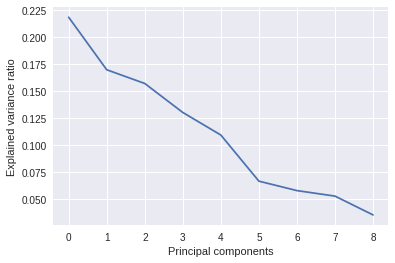

In [114]:
#PCA In Sklearn
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,9), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

#### From above figure, we will choose 6 as the dimensions of Principal components.

In [115]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 6)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end = '\n\n')
print(pca.explained_variance_ratio_)

[[ 2.15828689  0.99535894 -0.22508156 -0.37421799  0.15143552  0.15006536]
 [ 2.22199109  0.82580884 -0.71605667 -0.33776326  0.32475173  1.26627438]
 [ 2.45350261  0.53225356 -0.15195852 -0.34311331  0.02180765  0.03527933]
 ...
 [-0.55757379 -1.54349543  3.57832305 -1.95618552 -1.05726336  0.33083678]
 [ 1.68905301  1.48924692 -1.52409844 -0.94583371 -0.38876837  0.40616995]
 [ 1.48804504  1.39855264 -1.50672892 -0.8895801  -0.43127326  0.40839854]]

[0.21865662 0.17004478 0.1573444  0.13050065 0.10961463 0.0669199 ]


In [116]:
sum(pca.explained_variance_ratio_)

0.8530809722681653

In [117]:
x_pca.shape

(1236, 6)

# 2. Model Training
 - 2.1 Manually made neural network
 - 2.2 Tensorflow
 - 2.3 SVM
 - 2.3 Logistic regression

### Train and Test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, d1_labels, test_size=0.15, random_state=0)

In [119]:
X_train.shape

(1050, 6)

In [120]:
X_train

array([[ 1.03403981, -1.39573999,  0.91476656,  0.52522839, -0.93183466,
        -0.66555578],
       [ 0.6303657 ,  0.12215611, -0.93896619, -0.03785898, -0.63198924,
         0.1474626 ],
       [ 0.09036197, -0.4671592 , -1.11138188,  0.86679088, -1.17279392,
         0.91042225],
       ...,
       [ 1.21536472, -2.42437759,  0.98311713,  1.01155634,  1.73066621,
        -0.1135834 ],
       [-1.56767972,  1.14494384, -0.56918906, -0.05213318,  0.22963658,
        -0.51622093],
       [-1.35655635, -0.44901488, -0.47719188,  0.03886544, -0.0259929 ,
        -0.47816656]])

## 2.1 Manual Neural Network
 - 2.1.1 Structure of Neural Network
 - 2.1.2 Setting up the hyperparameters, train the NN and evaluate
 - 2.1.3  SGD method to improve the accuracy

### 2.1.1 Structure of the neural network

In [0]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
       
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
    
    def train(self, inputs_array, targets_array):
        # Converting inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        #targets = targets_array
        m = inputs_array.shape[0] # number of records
        
  
        ### Forward pass ###
        
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
       
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
       
        ### Backward pass ###
        
         
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors  # hidden layer gradients y = x -> 1
        
   
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
         
        
    def run(self, inputs_list):
        # forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
     
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

### 2.1.2 Training and evaluation

In [122]:
from sklearn import metrics
### Setting the hyperparameters ###
epochs = 100 #100
learning_rate = 0.01 #0.1
hidden_nodes = 10 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

for e in range(epochs):
    network.train(X_train, y_train)
    
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

print(metrics.accuracy_score(y_test,y_pred[0]))

0.4946236559139785


### 2.1.3 SGD

In [123]:
#N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

random_row_idx = np.zeros(128)
for e in range(epochs):
    random_row_idx = np.random.choice(X_train.shape[0],size=128)
    X_batch = X_train[random_row_idx,:]
    y_batch = y_train[random_row_idx]
    network.train(X_batch, y_batch)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [124]:
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0
print(metrics.accuracy_score(y_test,y_pred[0]))

0.6989247311827957


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


#### Wow, SGD improves the accuracy dramatically !!!!

## 2.2 Tensorflow

In [0]:
import tensorflow as tf

In [126]:
# one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Training and predicting.
classifier.fit(X_train, y_train, steps=300)
predictions = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f84e9dacfd0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpw9a_flc7'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpw9a_flc7/model.ckpt.
INFO:tensorflow:loss = 0.68957865, 

In [37]:
print('TF Accuracy: ', score)

TF Accuracy:  0.6935483870967742


## 2.3 SVM

In [0]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [39]:
y_pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
print('SVM Accuracy: ', metrics.accuracy_score(y_test,y_pred))

SVM Accuracy:  0.6989247311827957


## 2.4 Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [42]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
print('Log Regression Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Log Regression Accuracy:  0.6935483870967742


# 3. Summary
## Accuracies obtained by different models 
 - Manual NN: 49.46236559139785 %
 - TF Accuracy:  69.89247311827957 %
 - SVM Accuracy:  69.89247311827957 %
 - Log Regression Accuracy:  69.35483870967742 %
 
 
 ## These Accuray values can be fairly increased if more (clean) data is fed into the models